In [2]:
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [3]:
train = pd.read_csv("TrainingSet.csv",header = None)
test  = pd.read_csv("TestingSet.csv",header = None)

In [4]:
train.shape,test.shape

((1247, 291), (615, 291))

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,145.398426,143.947924,149.544565,148.546107,149.000002,147.242482,141.624307,144.572620,148.996453,149.195514,...,121.225816,120.597282,120.377565,124.842861,117.222031,131.023824,127.449612,0.0,13711.362181,81208.204676
1,149.124004,154.767439,151.297803,161.266186,154.527797,155.738589,156.416732,150.705914,163.808556,155.818415,...,128.570644,129.403415,127.143715,137.125952,137.386685,138.112987,126.240992,0.0,13795.015057,82093.181293
2,136.752202,134.564304,125.499360,143.369128,138.272648,128.842718,131.853407,129.183816,126.273212,123.048489,...,210.390025,232.626962,238.480241,224.306268,241.039751,221.927541,218.596117,0.0,15423.783365,80412.043124
3,135.031538,121.077362,130.089789,123.934188,117.022083,125.333571,131.738233,131.517786,127.237180,124.515591,...,144.031640,146.337742,157.788693,139.202443,147.019316,145.799245,143.488376,0.0,11428.642169,81288.598248
4,142.144929,154.917055,145.941569,134.759354,147.970888,135.737630,130.989025,128.658596,140.334149,137.824694,...,176.888576,172.254285,181.892623,178.539563,181.879098,190.691711,188.935366,0.0,9058.713216,82097.073962


In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,...,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,171.049824,171.867545,168.409612,169.913956,167.291437,168.035343,168.843836,170.470549,173.939796,176.062296,...,169.356235,171.498361,173.201235,174.967779,176.177053,173.290972,171.102992,0.556536,10301.750218,81392.570662
std,48.280559,45.101603,43.394473,42.578587,42.008907,44.594115,45.758284,49.295307,52.710463,55.500017,...,46.489622,49.363306,52.364113,53.181148,53.970860,51.804259,49.814305,0.496993,4739.876185,1002.462893
min,111.385442,117.714309,105.732914,115.409726,115.697673,108.680753,99.619695,107.235869,107.589231,107.566092,...,111.992802,107.448113,111.135749,108.460803,117.222031,106.706962,112.606213,0.000000,2573.832861,77122.596943
25%,137.591289,141.176991,137.302061,138.649414,136.812277,134.264854,134.181396,132.569448,132.994799,133.440306,...,141.180929,141.024324,139.934337,140.936670,140.274628,139.402392,137.759219,0.000000,6880.085254,81224.184204
50%,157.341068,158.455443,154.999305,157.471201,154.131335,155.400206,155.389156,157.033471,160.352532,159.244028,...,155.235084,156.004115,159.054151,158.478792,159.447725,157.325261,156.842946,1.000000,9690.689833,82028.582397
75%,191.259214,191.287978,189.014224,191.399839,188.458828,192.284448,192.887307,196.914417,199.469078,205.452919,...,181.515559,186.701043,187.963062,192.757214,193.421916,189.760564,188.958848,1.000000,13793.188905,82076.533815
max,486.588435,470.686864,459.288018,420.028121,389.533167,367.060624,385.167526,405.239527,409.570464,443.196297,...,466.640074,465.974870,490.411276,492.628822,498.234214,501.537691,510.977622,1.000000,23953.544877,82124.948369


In [7]:
x_train = train.iloc[:, :-1].values
y_train = train.iloc[:, 290].values

In [8]:
x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, 290].values

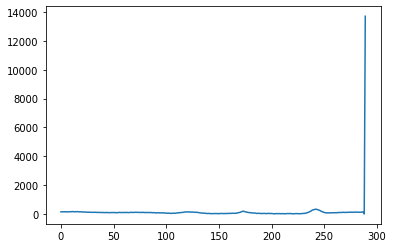

In [9]:
plt.plot(x_train[0])

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
y_train.shape,x_train.shape

((1247,), (1247, 290))

In [12]:
y_train = y_train.reshape((y_train.shape[0],1))

In [13]:
'''model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) '''

'model = xgboost.XGBRegressor(colsample_bytree=0.4,\n                 gamma=0,                 \n                 learning_rate=0.07,\n                 max_depth=3,\n                 min_child_weight=1.5,\n                 n_estimators=10000,                                                                    \n                 reg_alpha=0.75,\n                 reg_lambda=0.45,\n                 subsample=0.6,\n                 seed=42) '

In [14]:
model = SVR(gamma='scale',kernel='rbf',degree=13)
model.fit(x_train, y_train)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=13)

In [15]:
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6],
    'gamma':[0,0.03,0.1],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[1000],
    'reg_alpha':[1e-5, 1e-2],
    'reg_lambda':[1e-5, 1e-2],
    'subsample':[0.6,0.95]
}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

#gsearch1 = GridSearchCV(estimator = model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')
#gsearch1.fit(x_train,y_train)

In [16]:
'''print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)'''

"print (gsearch1.grid_scores_)\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)"

In [17]:
'''model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)'''

'model = xgboost.XGBRegressor(colsample_bytree=0.4,\n                 gamma=0,                 \n                 learning_rate=0.07,\n                 max_depth=3,\n                 min_child_weight=1.5,\n                 n_estimators=10000,                                                                    \n                 reg_alpha=0.75,\n                 reg_lambda=0.45,\n                 subsample=0.6,\n                 seed=42)'

In [18]:
#bst = model.fit(x_train,y_train)

In [19]:
y_pred = model.predict(x_test)

In [20]:
metrics.r2_score(y_test, y_pred)

-0.4019798371321466

In [21]:
floor(sqrt(mean_squared_error(y_test, y_pred)))

1180

In [22]:
max_diff = 0

for i in range(y_pred.shape[0]):
    if abs(y_pred[i] - y_test[i]) >= max_diff:
        max_diff = abs(y_pred[i] - y_test[i])

In [23]:
floor(max_diff)

4940

In [24]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df_repre.head(10)

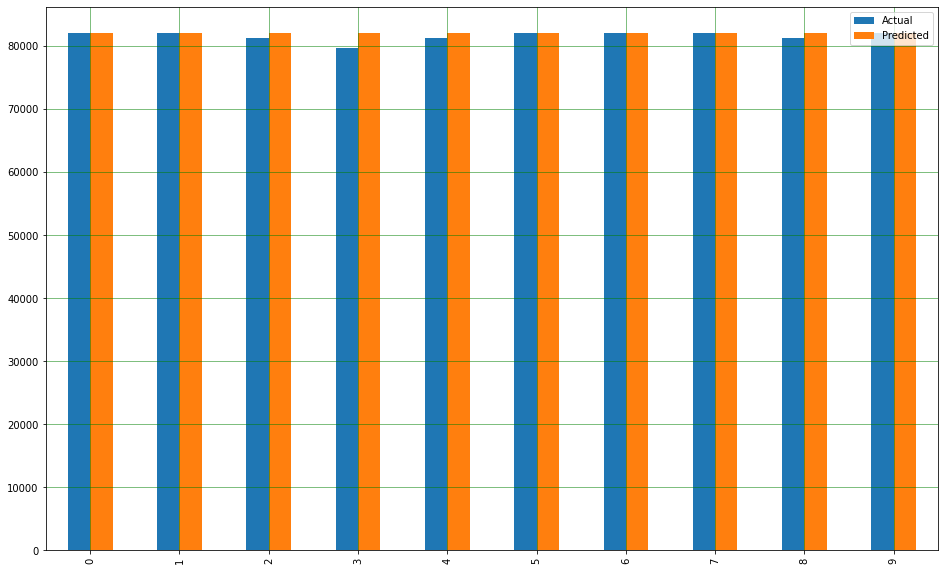

In [25]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
def precision(prediction,actual,threshold):
    return np.count_nonzero((abs(prediction-actual)<threshold))/len(prediction)*100

In [27]:
prec = []

for i in range(0,10000):
    prec.append(precision(y_pred,y_test,i))

In [28]:
for i in range(len(prec)):
    if prec[i] > 50:
        print(i,(prec[i]))
        break

93 50.081300813008134


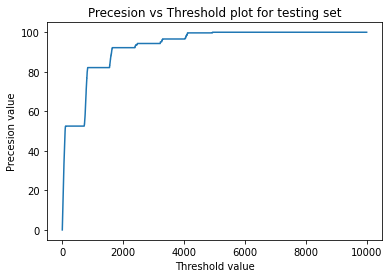

In [29]:
plt.plot(range(0,10000),prec)
plt.xlabel("Threshold value")
plt.ylabel("Precesion value")
plt.title("Precesion vs Threshold plot for testing set")
plt.plot();

In [30]:
test_c  = pd.read_csv("TestingSet.csv",header = None)

In [31]:
x_test_c = test_c.iloc[:, :-1].values
y_test_c = test_c.iloc[:, 290].values

In [32]:
y_pred_c = model.predict(x_test_c)

In [33]:
prec_cri = []

for i in range(0,10000):
    prec_cri.append(precision(y_pred_c,y_test_c,i))

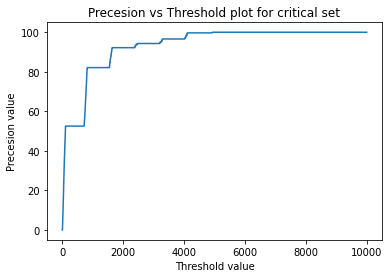

In [34]:
plt.plot(range(0,10000),prec_cri)
plt.xlabel("Threshold value")
plt.ylabel("Precesion value")
plt.title("Precesion vs Threshold plot for critical set")
plt.plot();

In [35]:
for i in range(len(prec_cri)):
    if prec_cri[i] > 50:
        print(i,(prec_cri[i]))
        break

100 50.081300813008134


In [36]:
metrics.r2_score(y_test_c, y_pred_c)

-0.3950089294110588

In [37]:
floor(sqrt(mean_squared_error(y_test_c, y_pred_c)))

1177

In [38]:
#y_pred_c[1]

In [39]:
max_diff = 0

for i in range(y_pred_c.shape[0]):
    if abs(y_pred_c[i] - y_test_c[i]) >= max_diff:
        max_diff = abs(y_pred_c[i] - y_test_c[i])

In [40]:
floor(max_diff)

4930